# AS6PR1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [43]:
data = pd.read_csv("Breast_Cancer_Dataset.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [44]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [55]:
data = data.drop(['Unnamed: 32'], axis=1)

In [56]:
le=LabelEncoder()

In [57]:
data["diagnosis"]= le.fit_transform(data["diagnosis"])


In [58]:
le.classes_

array([0, 1])

In [59]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [60]:
X = data.drop(columns = "diagnosis")
Y = data["diagnosis"]

In [61]:
X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [62]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [63]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 1)


In [64]:
reg = LogisticRegression()
reg.fit(X_train,Y_train)

LogisticRegression()

In [65]:
Y_pred = reg.predict(X_test)

In [86]:
reg_acc = accuracy_score(Y_test,Y_pred)
print("Logisticregressionaccurace=",reg_acc*100)

Logisticregressionaccurace= 94.15204678362574


In [72]:
gaussian_nb=GaussianNB()
gaussian_nb.fit(X_train,Y_train)

GaussianNB()

In [73]:
Y_pred = gaussian_nb.predict(X_test)

In [87]:
bayes_acc = accuracy_score(Y_test,Y_pred)
print("Naive bayes accuracy=",bayes_acc*100)

Naive bayes accuracy= 94.15204678362574


In [75]:
knn5=KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train,Y_train)

KNeighborsClassifier()

In [76]:
Y_pred=knn5.predict(X_test)

In [90]:
KNN_acc = accuracy_score(Y_test,Y_pred)
KNN_acc*100

94.15204678362574

In [78]:
svc = SVC(C=3)
svc.fit(X_train,Y_train)

SVC(C=3)

In [91]:
Y_pred=svc.predict(X_test)
svc_acc=accuracy_score(Y_test,Y_pred)
svc_acc*100

63.1578947368421

In [80]:
dt=DecisionTreeClassifier(criterion='entropy',splitter='best',max_features=3,max_depth=3)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=3)

In [88]:
Y_pred = dt.predict(X_test)
DT_acc = accuracy_score(Y_test,Y_pred)
print("Decision tree accuracy=",DT_acc*100)

Decision tree accuracy= 87.13450292397661


In [82]:
RF=RandomForestClassifier(n_estimators=100, criterion='entropy',max_depth=3)
RF.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=3)

In [89]:
Y_pred = RF.predict(X_test)
RF_acc = accuracy_score(Y_test,Y_pred)
print("Random forest accuracy=",RF_acc*100)

Random forest accuracy= 94.15204678362574


In [84]:
con_mat = metrics.confusion_matrix(Y_test,Y_pred)

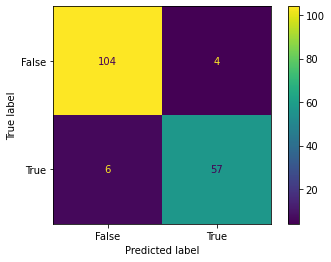

In [85]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels = [False, True])

cm_display.plot()
plt.show()